#📌 Extracción

In [3]:
import pandas as pd

In [4]:
dfTelecom = pd.read_json('TelecomX_Data.json')
dfTelecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [16]:
# Columnas con diccionarios
columnas_dict = ['customer', 'phone', 'internet', 'account']

In [21]:
# Transformar columnas con diccionarios a columnas simples
for col in columnas_dict:
    df_temp = pd.json_normalize(dfTelecom[col])
    dfTelecom = pd.concat([dfTelecom, df_temp], axis=1)
    dfTelecom.drop(columns=[col], inplace=True)

In [22]:
dfTelecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [25]:
dfTelecom.reset_index(inplace = True, drop = True)
dfTelecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

In [26]:
# Crear la columna cuentas diarias dividiendo 'ChargesMonthly' por 30 y que el resultado muestre solo 2 decimales
dfTelecom["Cuentas_Diarias"] = dfTelecom["Charges.Monthly"] / 30
dfTelecom["Cuentas_Diarias"] = dfTelecom["Cuentas_Diarias"].round(2)

In [27]:
dfTelecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [29]:
# Columnas que deben ser transformadas: sólo las estrictamente "Yes"/"No"
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    dfTelecom[col] = dfTelecom[col].map({'Yes': 1, 'No': 0})

# Verificar los cambios aplicados
dfTelecom[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,1,1,1,1
1,0,0,1,0
2,0,0,1,1
3,1,0,1,1
4,1,0,1,1


In [31]:
dfTelecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [33]:
# Reemplazar "No phone service" por "No" en la columna MultipleLines
dfTelecom['MultipleLines'] = dfTelecom['MultipleLines'].replace('No phone service', 'No')

# Verificar los valores únicos después del reemplazo
dfTelecom['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [34]:
# Transformar "Yes"/"No" a 1/0 en MultipleLines
dfTelecom['MultipleLines'] = dfTelecom['MultipleLines'].map({'Yes': 1, 'No': 0})

# Verificar el resultado
dfTelecom[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [36]:
# Reemplazar valores en la columna 'Contract'
dfTelecom['Contract'] = dfTelecom['Contract'].replace({
    'Month-to-month': '1',
    'One year': '2',
    'Two year': '3'
})

dfTelecom['Contract'] = dfTelecom['Contract'].astype('int64')

# Verificar que los cambios se hayan aplicado correctamente
dfTelecom['Contract'].value_counts()

,count
Contract,
1,4005
3,1743
2,1519


In [37]:
# Columnas que se transformarán: "Sí" → 1, todo lo demás → 0
cols_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Aplicar transformación
for col in cols_to_binary:
    dfTelecom[col] = dfTelecom[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Verificar los resultados
dfTelecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,2,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,1,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,1,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,2,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,1,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,3,0,Mailed check,67.85,4627.65,2.26


In [38]:
#verificar si hay valores repetidos en la columna 'customerID'
dfTelecom['customerID'].duplicated().sum()
dfTelecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,2,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,1,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,1,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,2,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,1,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,3,0,Mailed check,67.85,4627.65,2.26


In [39]:
# Diccionario para abreviar las formas de pago
payment_map = {
    'Electronic check': '1',
    'Mailed check': '2',
    'Bank transfer (automatic)': '3',
    'Credit card (automatic)': '4'
}

# Aplicar la transformación en la columna MetodoPago
dfTelecom['PaymentMethod'] = dfTelecom['PaymentMethod'].replace(payment_map)

# Verificar los cambios
dfTelecom['PaymentMethod'].value_counts()

,count
PaymentMethod,
1,2445
2,1665
3,1589
4,1568


In [40]:
# Crear un diccionario con los nuevos nombres de las columnas
column_rename_map = {
    'customerID': 'id_cliente',
    'Churn': 'evasion',
    'gender': 'genero',
    'SeniorCitizen': 'senior',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad',
    'PhoneService': 's_telefono',
    'MultipleLines': 'multipleslineas',
    'InternetService': 's_internet',
    'OnlineSecurity': 'seguridad_ol',
    'OnlineBackup': 'respaldo_ol',
    'DeviceProtection': 'proteccion_d',
    'TechSupport': 'serv_tec',
    'StreamingTV': 'tv_str',
    'StreamingMovies': 'pel_str',
    'Contract': 'contrato',
    'PaperlessBilling': 'boleta_elec',
    'PaymentMethod': 'met_pago',
    'Charges.Monthly': 'pago_mensual',
    'Charges.Total': 'pago_total',
    'Cuentas_Diarias': 'cuentas_diarias'
}

# Renombrar columnas en df
dfTelecom.rename(columns=column_rename_map, inplace=True)

# Verificar los nuevos nombres de columnas
dfTelecom.columns

Index(['id_cliente', 'evasion', 'genero', 'senior', 'pareja', 'dependientes',
       'antiguedad', 's_telefono', 'multipleslineas', 's_internet',
       'seguridad_ol', 'respaldo_ol', 'proteccion_d', 'serv_tec', 'tv_str',
       'pel_str', 'contrato', 'boleta_elec', 'met_pago', 'pago_mensual',
       'pago_total', 'cuentas_diarias'],
      dtype='object')

In [41]:
# Reemplazar 'Yes' por 'Sí' en la columna 'evasion'
dfTelecom['evasion'] = dfTelecom['evasion'].replace({'Yes': '1'}).replace({'':'0'}).replace({'No': '0'}).replace({'Si': '1'})

dfTelecom['evasion'] = dfTelecom['evasion'].astype('int64')

# Verificar los cambios
dfTelecom['evasion'].value_counts()


,count
evasion,
0,5398
1,1869


In [42]:
# Reemplazar female y male en la columna genero
dfTelecom['genero'] = dfTelecom['genero'].replace({'Female': '1'}).replace({'Male':'0'})

dfTelecom['genero'] = dfTelecom['genero'].astype('int64')

# Verificar los cambios
dfTelecom['genero'].value_counts()

,count
genero,
0,3675
1,3592


In [43]:
# Reemplazar servicios de internet en la columna s_internet
dfTelecom['s_internet'] = dfTelecom['s_internet'].replace({'Fiber optic': '1'}).replace({'DSL':'2'}).replace({'No':'0'})

dfTelecom['s_internet'] = dfTelecom['s_internet'].astype('int64')

# Verificar los cambios
dfTelecom['s_internet'].value_counts()

,count
s_internet,
1,3198
2,2488
0,1581


In [45]:
# Convertir pago_total a numérico
dfTelecom['pago_total'] = pd.to_numeric(dfTelecom['pago_total'], errors='coerce')

# Reemplazar valores faltantes usando antigüedad * pago_mensual
mask = dfTelecom['pago_total'].isna()
dfTelecom.loc[mask, 'pago_total'] = (
    dfTelecom.loc[mask, 'antiguedad'] * dfTelecom.loc[mask, 'pago_mensual']
)

In [46]:
# cambiar tipo de dato de la columna contrato a int64
dfTelecom['contrato'] = dfTelecom['contrato'].astype('int64')

# Verificar los cambios
dfTelecom['contrato'].value_counts()

,count
contrato,
1,4005
3,1743
2,1519


In [47]:
# cambiar tipo de dato de la columna met_pago a int64
dfTelecom['met_pago'] = dfTelecom['met_pago'].astype('int64')

# Verificar los cambios
dfTelecom['met_pago'].value_counts()

,count
met_pago,
1,2445
2,1665
3,1589
4,1568


In [48]:
# Verificar que ya no hay valores NaN y que el tipo de dato es float64
dfTelecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       7267 non-null   object 
 1   evasion          7267 non-null   int64  
 2   genero           7267 non-null   int64  
 3   senior           7267 non-null   int64  
 4   pareja           7267 non-null   int64  
 5   dependientes     7267 non-null   int64  
 6   antiguedad       7267 non-null   int64  
 7   s_telefono       7267 non-null   int64  
 8   multipleslineas  7267 non-null   int64  
 9   s_internet       7267 non-null   int64  
 10  seguridad_ol     7267 non-null   int64  
 11  respaldo_ol      7267 non-null   int64  
 12  proteccion_d     7267 non-null   int64  
 13  serv_tec         7267 non-null   int64  
 14  tv_str           7267 non-null   int64  
 15  pel_str          7267 non-null   int64  
 16  contrato         7267 non-null   int64  
 17  boleta_elec   

In [49]:
# guardar archivo
dfTelecom.to_csv('dfTelecom_final.csv', index=False)

In [5]:
import numpy as np

In [6]:
dfTelecom.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


## Customer

In [7]:
dfCustomer = pd.json_normalize(dfTelecom['customer'])
dfCustomer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [8]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


  ## Phone

In [9]:
dfPhone = pd.json_normalize(dfTelecom['phone'])
dfPhone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [10]:
dfPhone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


Internet

In [11]:
dfInternet = pd.json_normalize(dfTelecom['internet'])
dfInternet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [12]:
dfInternet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


Account

In [13]:
dfAccount = pd.json_normalize(dfTelecom['account'])
dfAccount

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [14]:
dfAccount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [15]:
dfAccount['Charges.Total'] = dfAccount['Charges.Total'].replace(' ', np.nan)
dfAccount['Charges.Total'] = dfAccount['Charges.Total'].astype(float)

dfAccount['Charges.Monthly'] = dfAccount['Charges.Monthly'].replace(' ', np.nan)
dfAccount['Charges.Monthly'] = dfAccount['Charges.Monthly'].astype(float)

dfAccount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


#📊 Carga y análisis

In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00


In [53]:
# Calcular frecuencia de evasores y no evasores
evasion_counts = dfTelecom['evasion'].value_counts().reset_index()
evasion_counts.columns = ['evasion', 'cantidad']
evasion_counts['evasion'] = evasion_counts['evasion'].map({0: 'no evade', 1: 'evade'})

# Graficar con Plotly
fig = px.bar(
    evasion_counts,
    x='evasion',
    y='cantidad',
    color='evasion',
    title='Distribución de evasión de clientes',
    text='cantidad'
)
fig.update_traces(textposition='outside')

# Ajustar tamaño del gráfico
fig.update_layout(showlegend=False, width=600, height=800)

# Mostrar el gráfico
fig.show()

# Guardar como imagen
fig.write_image("/content/grafico_evasion_barras.png")

In [55]:
# Calcular proporciones de evasores y no evasores
evasion_counts = dfTelecom['evasion'].value_counts().reset_index()
evasion_counts.columns = ['evasion', 'cantidad']
evasion_counts['evasion'] = evasion_counts['evasion'].map({0: 'no evade', 1: 'evade'})

# Crear gráfico de pastel interactivo
fig = px.pie(
    evasion_counts,
    names='evasion',
    values='cantidad',
    title='Proporción de evasión de clientes',
    color='evasion'
)

# Ajustar tamaño del gráfico
fig.update_layout(width=500, height=500)

# Mostrar el gráfico
fig.show()

# Guardar como imagen
fig.write_image("/content/grafico_evasion_pie.png")

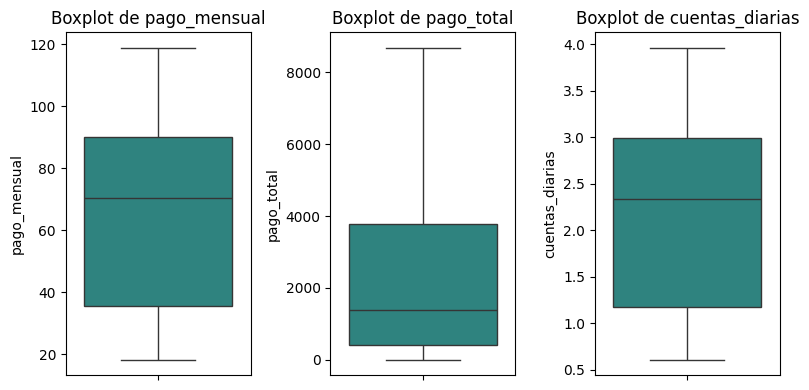

In [58]:
# Estadísticas descriptivas
desc_stats = dfTelecom[['pago_mensual', 'pago_total', 'cuentas_diarias']].describe()

# Crear gráficos boxplot verticales en gráficos separados
plt.figure(figsize=(8, 4))
variables = ['pago_mensual', 'pago_total', 'cuentas_diarias']

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=dfTelecom[var], palette='viridis')
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()

# guardar grafico
plt.savefig('/content/boxplot_variables.png')
desc_stats

plt.show()

In [59]:
from plotly.subplots import make_subplots

# Mapeo corregido de género
dfTelecom['genero_label'] = dfTelecom['genero'].map({0: 'masculino', 1: 'femenino'})
dfTelecom['evasion_label'] = dfTelecom['evasion'].map({0: 'no evade', 1: 'evade'})

# Agrupar datos por género y evasión
evasion_por_genero = dfTelecom.groupby(['genero_label', 'evasion_label']).size().reset_index(name='cantidad')

# Separar por género
masculino = evasion_por_genero[evasion_por_genero['genero_label'] == 'masculino']
femenino = evasion_por_genero[evasion_por_genero['genero_label'] == 'femenino']

# Crear subgráficos
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Gráfico para masculino (verde)
fig.add_trace(go.Pie(
    labels=masculino['evasion_label'],
    values=masculino['cantidad'],
    name="masculino",
    marker_colors=['#90ee90', '#006400'],
    legendgroup='masculino',
    showlegend=True
), 1, 1)

# Gráfico para femenino (morado)
fig.add_trace(go.Pie(
    labels=femenino['evasion_label'],
    values=femenino['cantidad'],
    name="femenino",
    marker_colors=['#d8b5ff', '#800080'],
    legendgroup='femenino',
    showlegend=True
), 1, 2)

# Layout final con tamaño ajustado
fig.update_layout(
    title_text='Proporción de evasión por género',
    width=900,
    height=500,
    annotations=[
        dict(text='masculino', x=0.04, y=0.0, font_size=14, showarrow=False),
        dict(text='femenino', x=0.70, y=0.0, font_size=14, showarrow=False)
    ]
)

fig.show()

# Guardar gráfico como imagen
fig.write_image("/content/grafico_evasion_genero.png")


In [63]:
# Mapear etiquetas descriptivas
dfTelecom['senior_label'] = dfTelecom['senior'].map({0: 'menor de 65', 1: 'mayor o igual a 65'})
dfTelecom['evasion_label'] = dfTelecom['evasion'].map({0: 'no evade', 1: 'evade'})
dfTelecom['grupo'] = dfTelecom['senior_label'] + ' - ' + dfTelecom['evasion_label']

# Contar combinaciones
conteo = dfTelecom['grupo'].value_counts().reset_index()
conteo.columns = ['grupo', 'cantidad']

# Mapa de colores personalizado
color_map = {
    'menor de 65 - no evade': '#add8e6',      # azul claro
    'menor de 65 - evade': '#00008b',         # azul oscuro
    'mayor o igual a 65 - no evade': '#ffd580', # naranja claro
    'mayor o igual a 65 - evade': '#ff8c00'     # naranja oscuro
}

# Crear gráfico de pastel interactivo
fig = px.pie(
    conteo,
    names='grupo',
    values='cantidad',
    title='Proporción de evasión según edad (mayor o menor de 65 años)',
    color='grupo',
    color_discrete_map=color_map
)

# Mejorar legibilidad
fig.update_traces(textinfo='percent', textposition='outside', textfont_size=14)

# Ajustar tamaño y diseño
fig.update_layout(title_font_size=20, legend_font_size=14, width=800, height=500)

# Guardar como imagen
fig.write_image("/content/grafico_evasion_edad.png")

# Mostrar el gráfico
fig.show()

In [64]:
# Mapear etiquetas
dfTelecom['pareja_label'] = dfTelecom['pareja'].map({0: 'sin pareja', 1: 'con pareja'})
dfTelecom['evasion_label'] = dfTelecom['evasion'].map({0: 'no evade', 1: 'evade'})
dfTelecom['grupo'] = dfTelecom['pareja_label'] + ' - ' + dfTelecom['evasion_label']

# Calcular conteo por grupo
conteo = dfTelecom['grupo'].value_counts().reset_index()
conteo.columns = ['grupo', 'cantidad']

# Colores personalizados
color_map = {
    'sin pareja - no evade': '#b0c4de',    # azul-gris claro
    'sin pareja - evade': '#4682b4',       # azul acero
    'con pareja - no evade': '#ffe4e1',    # rosado claro
    'con pareja - evade': '#ff69b4'        # rosado fuerte
}

# Crear gráfico de pastel
fig = px.pie(
    conteo,
    names='grupo',
    values='cantidad',
    title='Proporción de evasión según situación de pareja',
    color='grupo',
    color_discrete_map=color_map
)

# Mejorar legibilidad
fig.update_traces(textinfo='percent', textposition='outside', textfont_size=14)
fig.update_layout(title_font_size=20, legend_font_size=14)

# Ajustar tamaño y diseño
fig.update_layout(title_font_size=20, legend_font_size=14, width=800, height=500)

# Mostrar el gráfico
fig.show()

# Guardar como imagen
fig.write_image("/content/grafico_evasion_pareja.png")

In [65]:
# Mapear etiquetas
dfTelecom['dependientes_label'] = dfTelecom['dependientes'].map({0: 'sin dependientes', 1: 'con dependientes'})
dfTelecom['evasion_label'] = dfTelecom['evasion'].map({0: 'no evade', 1: 'evade'})
dfTelecom['grupo'] = dfTelecom['dependientes_label'] + ' - ' + dfTelecom['evasion_label']

# Calcular conteo por grupo
conteo = dfTelecom['grupo'].value_counts().reset_index()
conteo.columns = ['grupo', 'cantidad']

# Colores personalizados
color_map = {
    'sin dependientes - no evade': '#cce5ff',
    'sin dependientes - evade': '#3399ff',
    'con dependientes - no evade': '#ffe5b4',
    'con dependientes - evade': '#ff8c00'
}

# Crear gráfico de pastel
fig = px.pie(
    conteo,
    names='grupo',
    values='cantidad',
    title='Proporción de evasión según presencia de dependientes',
    color='grupo',
    color_discrete_map=color_map
)

# Ajustar el texto para que se muestre afuera de cada porción
fig.update_traces(textinfo='percent', textposition='outside', textfont_size=14)

# Ajustar tamaño y diseño
fig.update_layout(title_font_size=20, legend_font_size=14, width=800, height=500)

# Mostrar el gráfico
fig.show()

# Guardar como imagen
fig.write_image("/content/grafico_evasion_depend.png")

In [68]:
# Crear tramos de antigüedad y convertirlos a string desde el inicio
bins = range(0, dfTelecom["antiguedad"].max() + 10, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]
dfTelecom["tramo_antiguedad"] = pd.cut(dfTelecom["antiguedad"], bins=bins, labels=labels, include_lowest=True)

# Agrupar por tramo y evasión
conteo = dfTelecom.groupby(["tramo_antiguedad", "evasion"]).size().reset_index(name="cantidad")

# Mapear evasión a etiquetas legibles
conteo["evasion"] = conteo["evasion"].map({0: "No evade", 1: "Evade"})

# Gráfico de barras
fig = px.bar(conteo,
             x="tramo_antiguedad",
             y="cantidad",
             color="evasion",
             barmode="group",
             labels={"tramo_antiguedad": "Antigüedad (meses)", "cantidad": "Cantidad de clientes"},
             title="Distribución de Clientes por Tramos de Antigüedad y Evasión",
             color_discrete_map={"No evade": "green", "Evade": "red"})

# ajustar tamaño
fig.update_layout(width=600, height=500)

fig.show()

#guardar gráfico como imagen
fig.write_image("/content/grafico_evasion_antiguedad.png")

In [69]:
# Columnas de servicios contratados (excluyendo s_internet)
servicios = dfTelecom.columns[[7,8,10,11,12,13,14,15]]

# Asegurarse de que todas sean binarias
dfTelecom[servicios] = dfTelecom[servicios].applymap(lambda x: 1 if x != 0 else 0)

# Separar por evasión
evaden = dfTelecom[dfTelecom['evasion'] == 1]
no_evaden = dfTelecom[dfTelecom['evasion'] == 0]

# Calcular contrataciones por servicio
evaden_sums = evaden[servicios].sum()
no_evaden_sums = no_evaden[servicios].sum()

# Crear DataFrame para stacked bar
df_stacked = pd.DataFrame({
    'Servicio': servicios,
    'Evaden': evaden_sums.values,
    'No evaden': no_evaden_sums.values
})

# Convertir a formato largo
df_stacked = df_stacked.melt(id_vars='Servicio',
                             var_name='Grupo',
                             value_name='Cantidad')

# Calcular total por servicio para porcentaje
totales_por_servicio = df_stacked.groupby('Servicio')['Cantidad'].transform('sum')
df_stacked['Porcentaje'] = (df_stacked['Cantidad'] / totales_por_servicio * 100).round(2)

# Ordenar por total
orden = (evaden_sums + no_evaden_sums).sort_values(ascending=False).index.tolist()
df_stacked['Servicio'] = pd.Categorical(df_stacked['Servicio'], categories=orden, ordered=True)
df_stacked = df_stacked.sort_values('Servicio')

# Gráfico de barras apiladas (porcentaje)
fig = px.bar(df_stacked,
             x='Servicio', y='Porcentaje', color='Grupo',
             text='Porcentaje',
             title='Distribución porcentual de servicios contratados: Evaden vs No evaden',
             color_discrete_map={'Evaden': 'orange', 'No evaden': 'lightblue'})

fig.update_traces(texttemplate='%{text}%', textposition='inside')
fig.update_layout(barmode='stack', xaxis_title='Servicio', yaxis_title='Porcentaje')

#ajustar tamaño
fig.update_layout(width=800, height=500)

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_servicios.png")

In [70]:
# Graficar probabilidad de evasión vs cantidad de servicios contratados
# Seleccionar columnas de servicios (según las instrucciones anteriores: columnas 8 a 15)
columnas_servicios = dfTelecom.columns[[7,8,10,11,12,13,14,15]]

# Crear columna con el total de servicios contratados por cliente
dfTelecom['total_servicios'] = dfTelecom[columnas_servicios].sum(axis=1)

# Agrupar por número de servicios y calcular la tasa de evasión
evasion_por_servicios = dfTelecom.groupby('total_servicios')['evasion'].mean().reset_index()

# Graficar la relación
import plotly.express as px

fig = px.line(
    evasion_por_servicios,
    x='total_servicios',
    y='evasion',
    title='Probabilidad de evasión según número de servicios contratados',
    markers=True,
    labels={'total_servicios': 'Número de servicios contratados', 'evasion': 'Tasa de evasión'}
)
fig.update_traces(line=dict(width=3), marker=dict(size=8))
fig.update_layout(title_font_size=20, xaxis=dict(dtick=1))

#ajustar tamaño
fig.update_layout(width=800, height=500)

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_servicios_num.png")

In [71]:
dfTelecom['internet_tipo'] = dfTelecom['s_internet'].map({
    0: 'No tiene Internet',
    1: 'Fibra óptica',
    2: 'DSL'
})

# Agrupar y calcular la tasa de evasión
evas_internet = dfTelecom.groupby('internet_tipo', as_index=False)['evasion'].mean()
evas_internet['evasion'] *= 100  # a porcentaje

# Ordenar explícitamente para asegurar orden lógico
orden_tipo = ['No tiene Internet', 'DSL', 'Fibra óptica']
evas_internet['internet_tipo'] = pd.Categorical(evas_internet['internet_tipo'], categories=orden_tipo, ordered=True)
evas_internet = evas_internet.sort_values('internet_tipo')

# Graficar
fig = px.bar(
    evas_internet,
    x='internet_tipo',
    y='evasion',
    title='Tasa de evasión según tipo de servicio de Internet',
    labels={'internet_tipo': 'Tipo de Internet', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='internet_tipo',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=600, height=500, yaxis_range=[0, evas_internet['evasion'].max() + 5])

fig.show()
#guardar
fig.write_image("/content/grafico_evasion_internet.png")

In [72]:
# Mapear valores para legibilidad
map_contrato = {1: 'Mensual', 2: 'Anual', 3: 'Bianual'}
map_evasion = {0: 'No evade', 1: 'Evade'}

dfTelecom['contrato_nombre'] = dfTelecom['contrato'].map(map_contrato)
dfTelecom['evasion_nombre'] = dfTelecom['evasion'].map(map_evasion)

# Agrupar y calcular proporciones por tipo de contrato
conteo = dfTelecom.groupby(['contrato_nombre', 'evasion_nombre']).size().reset_index(name='cuenta')

# Total por tipo de contrato para porcentaje
total_por_contrato = conteo.groupby('contrato_nombre')['cuenta'].transform('sum')
conteo['porcentaje'] = (conteo['cuenta'] / total_por_contrato * 100).round(1)

# Crear gráfico
fig = px.bar(
    conteo,
    x='contrato_nombre',
    y='porcentaje',
    color='evasion_nombre',
    barmode='stack',
    text=conteo['porcentaje'].astype(str) + '%',
    color_discrete_map={'Evade': 'orange', 'No evade': 'lightblue'}
)

fig.update_layout(
    title='Porcentaje de evasión según tipo de contrato',
    xaxis_title='Tipo de contrato',
    yaxis_title='Porcentaje',
    legend_title='Evasión')

fig.update_traces(textposition='outside')
fig.update_layout(width=600, height=500)
fig.show()

#guardar
fig.write_image("/content/grafico_evasion_contrato.png")

In [73]:
# Mapear tipo de boleta
dfTelecom['tipo_boleta'] = dfTelecom['boleta_elec'].map({
    0: 'Boleta en papel',
    1: 'Boleta electrónica'
})

# Calcular tasa de evasión por tipo de boleta
evas_boleta = dfTelecom.groupby('tipo_boleta')['evasion'].mean().reset_index()
evas_boleta['evasion'] = evas_boleta['evasion'] * 100  # en porcentaje

# Graficar
fig = px.bar(
    evas_boleta,
    x='tipo_boleta',
    y='evasion',
    title='Tasa de evasión según tipo de boleta',
    labels={'tipo_boleta': 'Tipo de boleta', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='tipo_boleta',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, evas_boleta['evasion'].max() + 5])
# ajustar tamaño
fig.update_layout(width=600, height=500)

fig.show()
#guardar
fig.write_image("/content/grafico_evasion_boleta.png")

In [75]:
# Crear rangos de pago mensual
bins = [0, 30, 60, 90, 120, 150]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150']
dfTelecom['rango_pago'] = pd.cut(dfTelecom['pago_mensual'], bins=bins, labels=labels, include_lowest=True)

# Calcular tasa de evasión por rango
evas_pago = dfTelecom.groupby('rango_pago')['evasion'].mean().reset_index()
evas_pago['evasion'] *= 100  # Convertir a porcentaje

# Graficar
fig = px.bar(
    evas_pago,
    x='rango_pago',
    y='evasion',
    title='Tasa de evasión según pago mensual',
    labels={'rango_pago': 'Rango de pago mensual', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='rango_pago',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, evas_pago['evasion'].max() + 5])
fig.update_layout(width=600, height=500)

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_pago.png")

In [76]:
# Mapear métodos de pago
dfTelecom['met_pago_label'] = dfTelecom['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Calcular tasa de evasión por método de pago
evas_pago = dfTelecom.groupby('met_pago_label')['evasion'].mean().reset_index()
evas_pago['evasion'] *= 100  # Convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    evas_pago,
    x='met_pago_label',
    y='evasion',
    title='Tasa de evasión según método de pago',
    labels={'met_pago_label': 'Método de pago', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='met_pago_label',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, evas_pago['evasion'].max() + 5])
fig.update_layout(width=600, height=500)

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_met_pago.png")

In [78]:
# Mapear métodos de pago
dfTelecom['met_pago_label'] = dfTelecom['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Mapear tipo de contrato
dfTelecom['contrato_label'] = dfTelecom['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Agrupar y calcular tasa de evasión
grupo = dfTelecom.groupby(['met_pago_label', 'contrato_label'])['evasion'].mean().reset_index()
grupo['evasion'] *= 100  # porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo,
    x='met_pago_label',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según método de pago y tipo de contrato',
    labels={'met_pago_label': 'Método de pago', 'evasion': 'Tasa de evasión (%)', 'contrato_label': 'Tipo de contrato'},
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, grupo['evasion'].max() + 5])

fig.show()
#guardar
fig.write_image("/content/grafico_evasion_met_pago_contrato.png")


In [79]:
# Mapear tipo de contrato
dfTelecom['contrato_label'] = dfTelecom['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Crear rangos de antigüedad (en meses)
bins_ant = [0, 12, 24, 48, 72, 100]
labels_ant = ['0-12', '13-24', '25-48', '49-72', '73-100']
dfTelecom['rango_antiguedad'] = pd.cut(dfTelecom['antiguedad'], bins=bins_ant, labels=labels_ant, include_lowest=True)

# Agrupar y calcular tasa de evasión
grupo_ant = dfTelecom.groupby(['rango_antiguedad', 'contrato_label'])['evasion'].mean().reset_index()
grupo_ant['evasion'] *= 100  # a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_ant,
    x='rango_antiguedad',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según antigüedad y tipo de contrato',
    labels={'rango_antiguedad': 'Antigüedad (meses)', 'evasion': 'Tasa de evasión (%)', 'contrato_label': 'Tipo de contrato'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, grupo_ant['evasion'].max() + 5])

fig.show()
#guardar
fig.write_image("/content/grafico_evasion_antiguedad_contrato.png")

In [80]:
# Crear rangos para cuentas_diarias
bins_cd = [0, 1.5, 2.0, 2.5, 3.0, 4.0]
labels_cd = ['≤1.5', '1.51–2.0', '2.01–2.5', '2.51–3.0', '>3.0']
dfTelecom['rango_diario'] = pd.cut(dfTelecom['cuentas_diarias'], bins=bins_cd, labels=labels_cd, include_lowest=True)

# Calcular tasa de evasión por rango
evas_diarias = dfTelecom.groupby('rango_diario')['evasion'].mean().reset_index()
evas_diarias['evasion'] *= 100  # a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    evas_diarias,
    x='rango_diario',
    y='evasion',
    title='Tasa de evasión según costo diario',
    labels={'rango_diario': 'Rango de costo diario', 'evasion': 'Tasa de evasión (%)'},
    text='evasion',
    color='rango_diario',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, evas_diarias['evasion'].max() + 5])
fig.update_layout(width=600, height=500)

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_cuentas_diarias.png")

In [81]:
# Mapear tipo de contrato
dfTelecom['contrato_label'] = dfTelecom['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Crear rangos para cuentas_diarias
bins_cd = [0, 1.5, 2.0, 2.5, 3.0, 4.0]
labels_cd = ['≤1.5', '1.51–2.0', '2.01–2.5', '2.51–3.0', '>3.0']
dfTelecom['rango_diario'] = pd.cut(dfTelecom['cuentas_diarias'], bins=bins_cd, labels=labels_cd, include_lowest=True)

# Agrupar y calcular tasa de evasión
grupo_cd = dfTelecom.groupby(['rango_diario', 'contrato_label'])['evasion'].mean().reset_index()
grupo_cd['evasion'] *= 100  # convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_cd,
    x='rango_diario',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según costo diario y tipo de contrato',
    labels={'rango_diario': 'Rango de costo diario', 'evasion': 'Tasa de evasión (%)', 'contrato_label': 'Tipo de contrato'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, grupo_cd['evasion'].max() + 5])

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_cuentas_diarias_contrato.png")


In [83]:
# Mapear método de pago
dfTelecom['met_pago_label'] = dfTelecom['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Crear rangos para cuentas_diarias
bins_cd = [0, 1.5, 2.0, 2.5, 3.0, 4.0]
labels_cd = ['≤1.5', '1.51–2.0', '2.01–2.5', '2.51–3.0', '>3.0']
dfTelecom['rango_diario'] = pd.cut(dfTelecom['cuentas_diarias'], bins=bins_cd, labels=labels_cd, include_lowest=True)

# Agrupar y calcular tasa de evasión
grupo_cd_pago = dfTelecom.groupby(['rango_diario', 'met_pago_label'])['evasion'].mean().reset_index()
grupo_cd_pago['evasion'] *= 100  # a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_cd_pago,
    x='rango_diario',
    y='evasion',
    color='met_pago_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según costo diario y método de pago',
    labels={'rango_diario': 'Rango de costo diario', 'evasion': 'Tasa de evasión (%)', 'met_pago_label': 'Método de pago'},
    color_discrete_sequence=px.colors.qualitative.Prism
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_range=[0, grupo_cd_pago['evasion'].max() + 5])

fig.show()
#guardar
fig.write_image("/content/grafico_evasion_cuentas_diarias_met_pago.png")

In [84]:
# Seleccionar columnas de servicios (s_telefono a pel_str → columnas 7 a 15)
columnas_servicios = [
    's_telefono', 'multipleslineas', 's_internet', 'seguridad_ol', 'respaldo_ol',
    'proteccion_d', 'serv_tec', 'tv_str', 'pel_str'
]

# Crear variable booleana: 1 si tiene contratado, 0 si no (i.e., != 0)
dfTelecom['total_servicios_binarios'] = dfTelecom[columnas_servicios].apply(lambda row: (row != 0).sum(), axis=1)

# Filtrar para evitar división por cero
df_validos = dfTelecom[dfTelecom['total_servicios_binarios'] > 0].copy()

# Calcular precio promedio por servicio
df_validos['precio_prom_binario'] = df_validos['pago_mensual'] / df_validos['total_servicios_binarios']

# Crear rangos de antigüedad
bins_ant = [0, 12, 24, 48, 72, 100]
labels_ant = ['0-12', '13-24', '25-48', '49-72', '73-100']
df_validos['rango_antiguedad'] = pd.cut(df_validos['antiguedad'], bins=bins_ant, labels=labels_ant, include_lowest=True)

# Agrupar y calcular promedio del precio
precio_rango = df_validos.groupby('rango_antiguedad')['precio_prom_binario'].mean().reset_index()

# Graficar
fig = px.bar(
    precio_rango,
    x='rango_antiguedad',
    y='precio_prom_binario',
    title='Precio promedio por servicio contratado según antigüedad',
    labels={'rango_antiguedad': 'Antigüedad (meses)', 'precio_prom_binario': 'Precio promedio por servicio'},
    text='precio_prom_binario',
    color='rango_antiguedad',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', yaxis_title='$ por servicio')
fig.update_layout(width=600, height=500)

fig.show()
#guardar
fig.write_image("/content/grafico_precio_prom_binario_antiguedad.png")

In [85]:
# Asegurar etiquetas de contrato
df_validos['contrato_label'] = df_validos['contrato'].map({
    1: 'Mensual',
    2: 'Anual',
    3: 'Bianual'
})

# Crear rangos de precio por servicio
bins_precio = [0, 10, 20, 30, 40, 60, 100]
labels_precio = ['≤10', '11–20', '21–30', '31–40', '41–60', '>60']
df_validos['rango_precio'] = pd.cut(df_validos['precio_prom_binario'], bins=bins_precio, labels=labels_precio, include_lowest=True)

# Calcular tasa de evasión por rango de precio y tipo de contrato
grupo_precio_contrato = df_validos.groupby(['rango_precio', 'contrato_label'])['evasion'].mean().reset_index()
grupo_precio_contrato['evasion'] *= 100  # a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_precio_contrato,
    x='rango_precio',
    y='evasion',
    color='contrato_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según precio por servicio y tipo de contrato',
    labels={'rango_precio': 'Precio promedio por servicio', 'evasion': 'Tasa de evasión (%)', 'contrato_label': 'Tipo de contrato'},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_precio_contrato.png")

In [86]:
# Mapear método de pago
df_validos['met_pago_label'] = df_validos['met_pago'].map({
    1: 'Cheque electrónico',
    2: 'Cheque por correo',
    3: 'Transferencia bancaria',
    4: 'Tarjeta de crédito'
})

# Asegurar que el rango de precio por servicio ya existe
bins_precio = [0, 10, 20, 30, 40, 60, 100]
labels_precio = ['≤10', '11–20', '21–30', '31–40', '41–60', '>60']
df_validos['rango_precio'] = pd.cut(df_validos['precio_prom_binario'], bins=bins_precio, labels=labels_precio, include_lowest=True)

# Agrupar y calcular tasa de evasión
grupo_precio_pago = df_validos.groupby(['rango_precio', 'met_pago_label'])['evasion'].mean().reset_index()
grupo_precio_pago['evasion'] *= 100  # convertir a porcentaje

# Graficar
import plotly.express as px

fig = px.bar(
    grupo_precio_pago,
    x='rango_precio',
    y='evasion',
    color='met_pago_label',
    barmode='group',
    text='evasion',
    title='Tasa de evasión según precio por servicio y método de pago',
    labels={'rango_precio': 'Precio promedio por servicio', 'evasion': 'Tasa de evasión (%)', 'met_pago_label': 'Método de pago'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

#guardar
fig.write_image("/content/grafico_evasion_precio_met_pago.png")

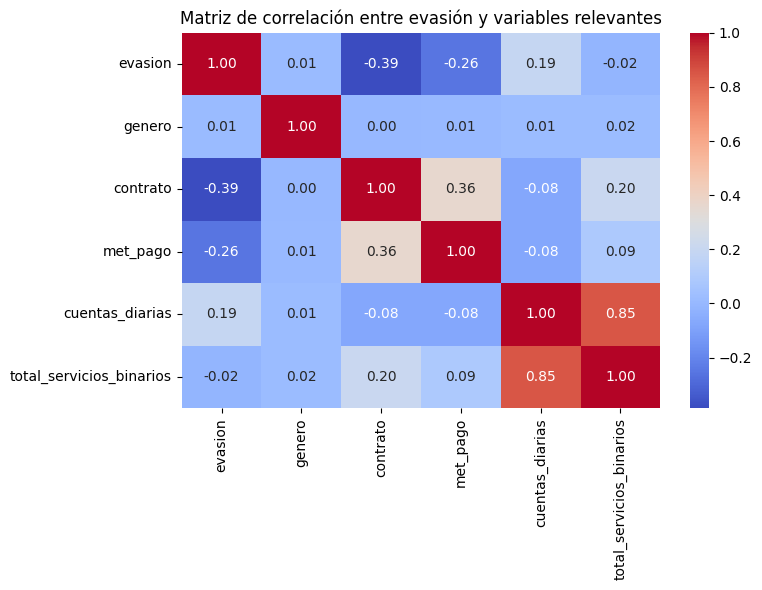

In [89]:
# Matriz correlación
# Crear columnas necesarias
columnas_servicios = [
    's_telefono', 'multipleslineas', 's_internet', 'seguridad_ol', 'respaldo_ol',
    'proteccion_d', 'serv_tec', 'tv_str', 'pel_str'
]
dfTelecom['total_servicios_binarios'] = dfTelecom[columnas_servicios].apply(lambda row: (row != 0).sum(), axis=1)

# Seleccionar variables relevantes
vars_corr = ['evasion', 'genero', 'contrato', 'met_pago', 'cuentas_diarias', 'total_servicios_binarios']
cor_matrix = dfTelecom[vars_corr].corr()

# Visualizar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre evasión y variables relevantes")
plt.tight_layout()

# Mostrar correlación ordenada con evasión
cor_matrix['evasion'].sort_values(ascending=False)

#guardar
plt.savefig("/content/matriz_correlacion.png")

plt.show()

#📄Informe final

## 🔸 Hallazgos

### 1. Distribución General de la Evasión  

La visualización circular muestra que una fracción significativa (25.7%) de clientes ha abandonado el servicio. Esta situación justifica la necesidad de implementar estrategias de retención, dado que la evasión no es marginal, sino que representa una amenaza para la sostenibilidad del negocio.

### 2. Evasión por Tipo de Contrato


Los contratos de corto plazo, especialmente los mensuales, presentan la mayor tasa de evasión. Por el contrario, los contratos anuales o bianuales muestran niveles de retención considerablemente mejores, lo que sugiere que el compromiso a largo plazo se traduce en mayor fidelidad.

Recomendación: Fomentar contratos de mayor duración mediante descuentos o beneficios exclusivos.

### 3. Evasión por Género

El análisis revela que no existen diferencias relevantes entre hombres y mujeres respecto a la evasión, lo cual permite descartar el género como factor determinante en la decisión de abandono.

### 4. Evasión por Edad  

Los clientes más jóvenes presentan mayor propensión a abandonar el servicio, posiblemente por menor fidelidad o mayor sensibilidad al precio. En contraste, la estabilidad incrementa en grupos de edad media, que muestran menor tasa de evasión.

### 6. Método de Pago y Contrato

Los clientes con contratos mensuales y pagos manuales registran la mayor tasa de evasión. En cambio, quienes utilizan pagos automáticos están menos propensos a abandonar el servicio.

Ventajas de los pagos automáticos:

Disminuyen el esfuerzo del cliente al evitar pagos repetitivos.

Generan hábitos financieros estables.

Reducen evasiones por olvido o desorganización.

Recomendación: Promover pagos automáticos con incentivos o beneficios adicionales.

---

## 🔸 Conclusiones generales

- Los clientes con contratos cortos, pagos manuales y bajo nivel de pagos diarios tienen mayor propensión a abandonar el servicio.

- Fomentar pagos automáticos y contratos de largo plazo son estrategias prioritarias.

- Es fundamental segmentar y actuar sobre grupos de riesgo usando herramientas predictivas y visualizaciones analíticas.

---

## 🔸 Recomendaciones

- ✅ Incentivar contratos largos
- ✅ Fomentar pagos automáticos
- ✅ Ofrecer beneficios por mayor compromiso diario
- ✅ Aplicar estrategias de retención personalizadas
- ✅ Usar modelos predictivos para actuar antes de la evasión

___
